In [189]:
import pandas as pd
import numpy as np

<h1>6.2 Data Cleaning & Preparation</h1>

In [190]:
data = "../datasets/credit_scoring.csv"

In [191]:
df = pd.read_csv(data)

In [192]:
df.head()
# we can see that some of the categorical variables are encoded with numbers, and that's not
# very friendly for understanding the data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [193]:
df.columns = df.columns.str.lower()

In [194]:
# map takes a dictionary and maps existing values to new ones
status_values = {
    1:'ok',
    2:'default', 
    0:'unk'
}

df.status = df.status.map(status_values)

In [195]:
home_values = {
    1:'rent',
    2:'owner', 
    3:'private',
    4:'ignore',
    5:'parents',
    6:'other',
    0:'unk'
}

df.home = df.home.map(home_values)

In [196]:
marital_values = {
    1:'single',
    2:'married', 
    3:'widow',
    4:'separated',
    5:'divorced',
    0:'unk'
}

df.marital = df.marital.map(marital_values)

In [197]:
records_values = {
    1:'no',
    2:'yes', 
    0:'unk'
}

df.records = df.records.map(records_values)

In [198]:
job_values = {
    1:'fixed',
    2:'partime', 
    3:'freelance',
    4:'others',
    0:'unk'
}

df.job = df.job.map(job_values)

In [199]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [200]:
df.describe().round()
# according to the datasets documentation, values with 99999999 are actually missing values

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [201]:
# replace missing values
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

In [202]:
df.describe().round()
# no more 99999999's

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,130.0,5346.0,342.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,87.0,11525.0,1244.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,119.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,164.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [203]:
df.status.value_counts()
# we have one unknown value somewhere, let's remove it

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [204]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [205]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [207]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [208]:
# get y_arrays and remove status variable from df sets
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

del df_train['status']
del df_val['status']
del df_test['status']

<h1>6.3 Decision Trees</h1>

In [209]:
# example of a very simple decision tree:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'partime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [210]:
xi = df_train.iloc[0].to_dict()

In [211]:
assess_risk(xi)

'ok'

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [213]:
train_dicts = df_train.to_dict(orient='records')

In [214]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [215]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [216]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [217]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [218]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [219]:
roc_auc_score(y_val, y_pred)

0.6547098641350415

In [220]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [221]:
# this indicates overfitting: the model memorizes the data but fails to generalize
# we can tune this by controlling the depth

In [222]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [223]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [224]:
# visual for how tree was trained
from sklearn.tree import export_text

In [225]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



In [226]:
best_depth = 0
best_auc = 0
best_val = 0
val_depth = 0

for i in range(1,50):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_train)[:, 1]
    t_auc = roc_auc_score(y_train, y_pred)

    y_pred = dt.predict_proba(X_val)[:, 1]
    v_auc = roc_auc_score(y_val, y_pred)
    
    if t_auc > best_auc:
        best_auc = t_auc
        best_depth = i
    if v_auc > best_val:
        best_val = v_auc
        val_depth = i

print(f"Best training auc: {best_auc} @ depth {best_depth}")
print(f"Best validation auc: {best_val} @ depth {val_depth}")

Best training auc: 1.0 @ depth 20
Best validation auc: 0.7669377103969388 @ depth 5


<h1>6.4 Decision Tree Learning Algorithm</h1>

In [227]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default']
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])

In [228]:
df_example.sort_values('assets')
# we want to come up with a threshold that splits the data

,assets,debt,status
2,0,1000,default
1,2000,1000,default
7,3000,2000,default
5,4000,1000,ok
3,5000,1000,ok
4,5000,1000,ok
0,8000,3000,default
6,9000,500,ok


In [229]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [230]:
from IPython.display import display

In [231]:
for T in Ts:
    df_right = df_example[df_example.assets > T]
    df_left = df_example[df_example.assets <= T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True)) # normalize to look at the ratios instead of the numbers
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print(T)

,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
0


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
5000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64
8000


In [232]:
df_example.sort_values('debt')
# this variable has fewer thresholds

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [233]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [234]:
for feature, Ts in thresholds.items():
    print('#########################')
    for T in Ts:
        df_right = df_example[df_example[feature] > T]
        df_left = df_example[df_example[feature] <= T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True)) # normalize to look at the ratios instead of the numbers
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print(T)
    print('#########################')

#########################


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
0


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
5000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64
8000
#########################
#########################


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64
500


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64
1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64
2000
#########################


<h1>6.5 Decision Tree Parameter Tuning</h1>

In [235]:
start = 1
end = 100

depth_range = list(range(start, end+1))
depth_range.append(None)

In [236]:
depth_scores = []

for d in depth_range:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    depth_scores.append((d, auc))
    #print('%4s -> %.3f' % (d, auc))

df_depth_scores = pd.DataFrame(depth_scores, columns=['d', 'auc'])
df_depth_scores.sort_values(by='auc', ascending=False).head()

,d,auc
4,5.0,0.766938
5,6.0,0.761949
3,4.0,0.761283
6,7.0,0.753615
2,3.0,0.738908


In [237]:
# now take the optimal depth values and optimize for min_samples_leaf:
scores = []

for d in [3, 4, 5, 6, 7, 8, 9, 10]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [238]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [239]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
67,10,15,0.790738
58,9,15,0.788534
59,9,20,0.787690
31,6,15,0.785695
68,10,20,0.785671


In [240]:
# pivot the data to make it easier to interpret
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth            3      4      5      6      7      8      9      10
min_samples_leaf                                                        
1                 0.739  0.761  0.766  0.761  0.746  0.730  0.722  0.687
2                 0.739  0.761  0.766  0.765  0.756  0.747  0.711  0.726
5                 0.739  0.761  0.768  0.760  0.754  0.749  0.743  0.734
10                0.739  0.761  0.762  0.778  0.765  0.762  0.765  0.771
15                0.738  0.764  0.773  0.786  0.780  0.780  0.789  0.791
20                0.736  0.761  0.774  0.773  0.779  0.779  0.788  0.786
100               0.736  0.756  0.763  0.776  0.780  0.779  0.779  0.779
200               0.729  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

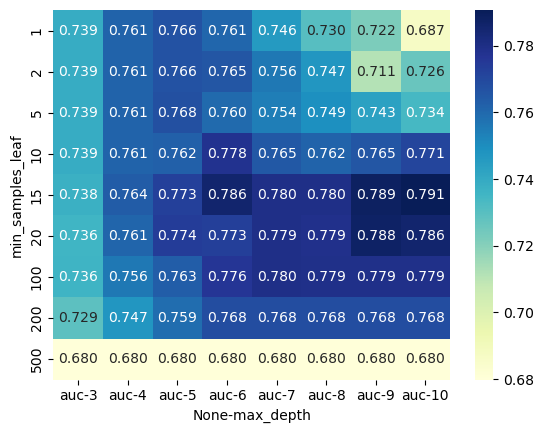

In [242]:
sns.heatmap(df_scores_pivot, cmap="YlGnBu", annot=True, fmt='.3f')
plt.show()

In [530]:
# train final model
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

<h1>6.6 Ensemble Learning and Random Forest</h1>

In [304]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
rf = RandomForestClassifier(n_estimators=10, random_state=1) # fix random_state for reproducibility
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [318]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [320]:
# tune for number of estimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n,
                                random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [321]:
columns = ['n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


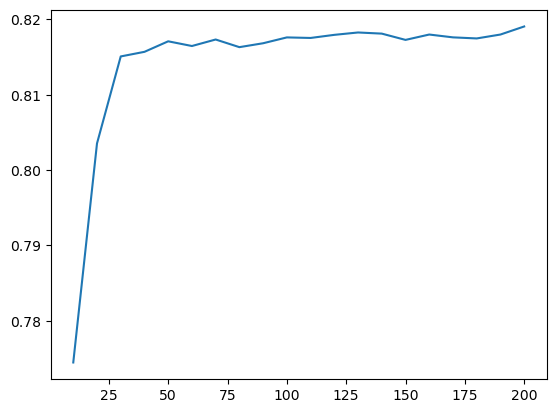

In [322]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [324]:
# tune for depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [326]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

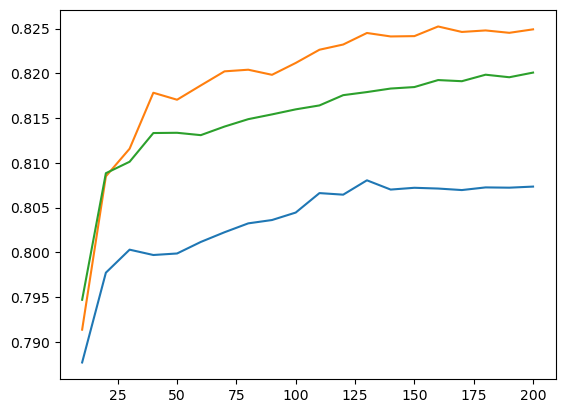

In [327]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth={d}')

In [328]:
# we have now found the best max_depth, now we tune for the best min_samples_leaf
max_depth = 10

In [330]:
# tune for leaves
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [331]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [334]:
colors = ['black', 'blue', 'red', 'orange', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'red'), (10, 'orange'), (50, 'grey')]

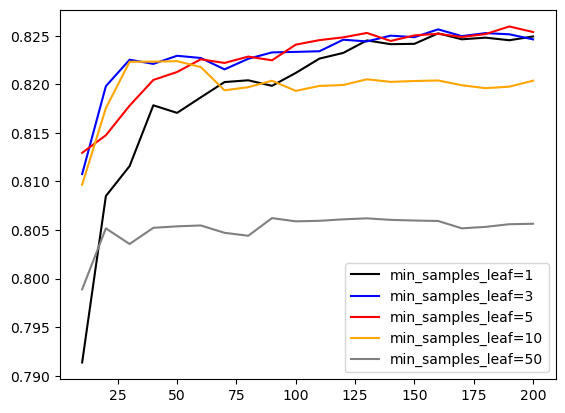

In [336]:
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, 
             df_subset.auc, 
             color=col,
             label=f'min_samples_leaf={s}')

plt.legend()

In [338]:
# now we choose which leaf sample is best, in this case probably 3, but 1 and 5 are also good.
min_samples_leaf = 3

In [374]:
# now we train the final model with the tuned parameters
rf = RandomForestClassifier(n_estimators=50, # don't forget to enter your best n_estimators value here
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=1)

<h1>6.7 Gradient Boosting and XGBoost</h1>

In [414]:
#!pip install xgboost

In [415]:
import xgboost as xgb

In [1]:
# create DMatrix of the train and val data, DMatrix is optimized for this type of training
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

NameError: name 'dv' is not defined

In [417]:
# specify the XGBoost parameters
# you can find the default values and information about each in the XGBoost documentation
xgb_params = {
    'eta': 0.3, # essentially how "fast" the model learns (learning rate)
    'max_depth': 6, # size of tree, same as random forest/decision tree modeling
    'min_child_weight': 1, # same as min_samples_leaf
    
    'objective': 'binary:logistic', # specify what type of task we are solving, in this case binary classification
    'nthread': 8, # XGBoost can parallelize, we have to specify how many threads
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [418]:
y_pred = model.predict(dval)

In [419]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [420]:
# to watch training "live"
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [421]:
%%capture output
# you can see that the training auc reaches 1, but the validation set stagnates somewhere
# it would easier to visualize in a plot but XGBoost doesn't provide a good way to do so
# we can use jupyter to "capture" the output from this and use it as input for plotting

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc', # specify the evaluation metric you want to see
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [422]:
s = output.stdout
print(s)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [423]:
line = s.split('\n')[0]
print(line)
num_iter, train_auc, val_auc = line.split('\t')

[0]	train-auc:0.86730	val-auc:0.77938


In [424]:
int(num_iter.strip('[]'))

0

In [425]:
float(train_auc.split(':')[1])

0.8673

In [426]:
float(val_auc.split(':')[1])

0.77938

In [427]:
# create a function to do this
def parse_xgb_output(output):
    results = []
    tree = []
    aucs_train = []
    aucs_val = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

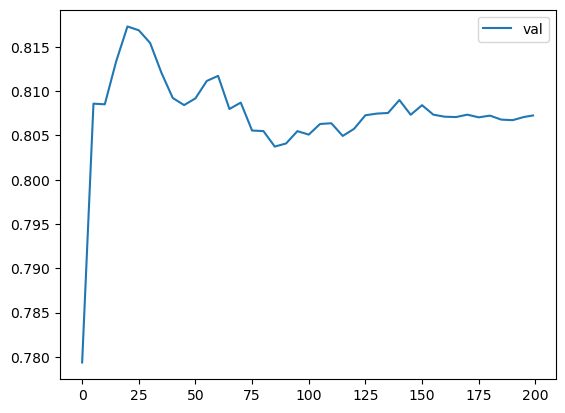

In [428]:
df_score = parse_xgb_output(output)
#plt.plot(df_score.num_iter, df_score.train_auc, label='train') # this will always achieve perfection
plt.plot(df_score.num_iter, df_score.val_auc, label='val')

plt.legend()

<h1>6.8 XGBoost Parameter Tuning</h1>

<h3>Train eta</h3>

In [461]:
# ONLY RUN THIS ONCE THEN RUN THE BELOW WITH DIFFERENT ETA VALUES
scores = {}
# this is a really annoying way to add all these to a dictionary, but it's because of the
# parse_xgb_output funtion and needing to capture output in jupyter

In [474]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc', # specify the evaluation metric you want to see
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=200, 
                  verbose_eval=5, 
                  evals=watchlist)

In [475]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [476]:
scores.keys()

dict_keys(['eta=0.05', 'eta=0.1', 'eta=1.0', 'eta=0.3', 'eta=0.01'])

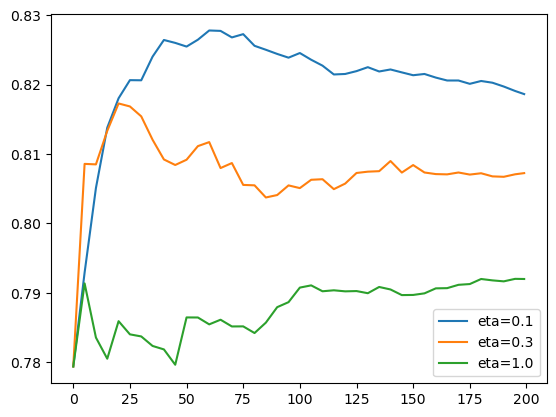

In [479]:
# plot the results
etas = ['eta=0.1', 'eta=0.3', 'eta=1.0']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

<h3>Train max_depth</h3>

In [487]:
# reset scores to train other parameters
# run this cell first, then run below to enter each desired max_depth into scores dictionary
scores = {}

In [497]:
%%capture output

xgb_params = {
    'eta': 0.1, # eta is tuned as per results above
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc', # specify the evaluation metric you want to see
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=200, 
                  verbose_eval=5, 
                  evals=watchlist)

In [498]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [499]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10'])

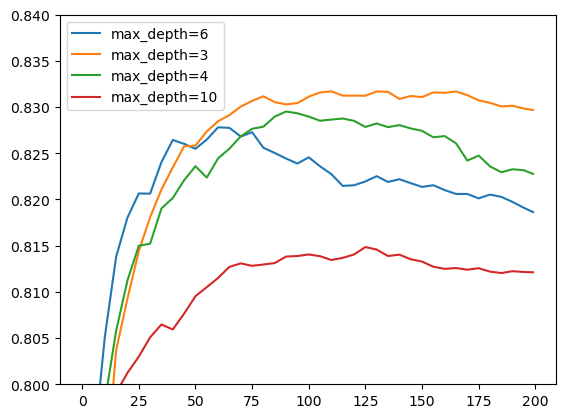

In [502]:
# plot the results
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.8, 0.84)
plt.legend()

<h3>Train min_child_weight</h3>

In [508]:
scores = {}

In [520]:
%%capture output

xgb_params = {
    'eta': 0.1, # eta is tuned as per results above
    'max_depth': 3, # max_depth is tuned as per results above
    'min_child_weight': 300,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc', # specify the evaluation metric you want to see
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=200, 
                  verbose_eval=5, 
                  evals=watchlist)

In [521]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [522]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30', 'min_child_weight=300'])

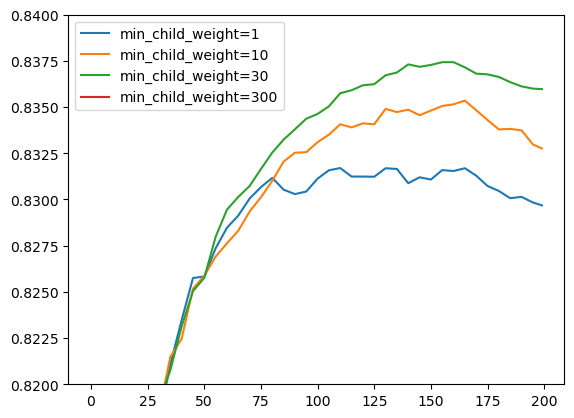

In [525]:
# plot the results
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.82, 0.84)
plt.legend()

In [526]:
# use this final training set to determine number of iterations as well (150)

<h3>Train final tuned model</h3>

In [529]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)

Other parameters: http://xgboost.readthedocs.io/en/latest/parameter.html

Useful parameters:
<ul>
    <li>subsample</li>
    <li>colsample_bytree</li>
    <li>lambda</li>
    <li>alpha</li>
</ul>

<h1>Selecting the Best Model</h1>

In [531]:
# best decision tree model
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

In [535]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7916434574120268

In [533]:
# best random forest model
rf = RandomForestClassifier(n_estimators=50,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=1)

In [536]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8229365963527162

In [534]:
# best gradient boost model
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

xgb.train(xgb_params, dtrain, num_boost_round=150)

In [537]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8373465161899687

In [539]:
# xgb is the best model, so let's use the entire dataset to do training
df_full_train = df_full_train.reset_index(drop=True)

In [542]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [543]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [545]:
del df_full_train['status']

In [548]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [561]:
feature_names = dv.get_feature_names_out().tolist()

In [562]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=feature_names)

dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [563]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [564]:
y_pred = model.predict(dtest)

In [566]:
y_pred[:10]

array([0.28148836, 0.22716059, 0.0728527 , 0.18244669, 0.35234353,
       0.24781121, 0.00663041, 0.02250845, 0.24643841, 0.3061694 ],
      dtype=float32)

In [567]:
roc_auc_score(y_test, y_pred)

0.8329443819950149